In [108]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Open DF with countries encoded 

In [109]:
df = pd.read_csv('df_for_ML.csv', index_col='date')
df.result.value_counts()

3    4813
0    2916
1    2349
Name: result, dtype: int64

In [110]:
df.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,result
date,,,,,,,,,,,,,
1993-08-08,24,117,8,14,85.941860,79.248175,85.902907,86.538372,85.355233,76.813139,79.659854,77.708759,1
1993-08-08,52,193,35,94,71.275510,67.595745,70.599091,75.413265,75.042857,72.443243,74.760000,73.500000,3
1993-08-15,9,31,52,46,78.088710,71.726190,72.558065,74.718548,74.060484,68.810714,71.543210,72.527381,3
1993-08-15,180,24,22,8,79.368421,86.369128,79.753509,83.721053,78.356140,86.066443,86.607383,85.288591,1
1993-08-22,6,139,5,70,80.490566,69.581395,82.635220,88.293082,84.132704,70.993878,76.436735,73.813636,3


# Define X and y

In [111]:
X = df.drop(['result'], axis=1)
y = df['result']

In [113]:
X.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

## Scaling using StandScaler 
* I don't want "yet" to remove the few outliers 

In [80]:
from sklearn.preprocessing import StandardScaler
import sklearn

Scaller = StandardScaler()
 
# standardization 
X = Scaller.fit_transform(X) 

In [81]:
'''from sklearn.preprocessing import MinMaxScaler

Minmax = MinMaxScaler()
 
# standardization 
X = Minmax.fit_transform(X) '''

'from sklearn.preprocessing import MinMaxScaler\n\nMinmax = MinMaxScaler()\n \n# standardization \nX = Minmax.fit_transform(X) '

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 , stratify=y) #, stratify=y)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6752, 12), (3326, 12), (6752,), (3326,))

In [36]:
names = ["Nearest Neighbors", "Logistic Regression","Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(hidden_layer_sizes=(150,100,50), alpha = 0.05, 
                       max_iter = 50,activation = 'relu', learning_rate = 'constant', 
                       solver = 'adam' , early_stopping=True),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [37]:
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)

        # prediction_proba = clf.predict_proba(X_test)
        # logloss = log_loss(y_test,prediction_proba)
        # precision, recall, fscore, support = score(y_test, prediction)
        # conf_martrix = confusion_matrix(y_test, prediction)
        # clas_report = classification_report(y_test, prediction)

        print(name, accuracy)

Nearest Neighbors 0.5292841648590022
Logistic Regression 0.5841338704679269
Linear SVM 0.5887821506042764
RBF SVM 0.5835140997830802
Gaussian Process 0.6017973349860551
Decision Tree 0.5683297180043384
Random Forest 0.5866129532073133
Neural Net 0.5841338704679269
AdaBoost 0.5807251317012705
Naive Bayes 0.5695692593740316
QDA 0.5612023551286024


## SGDClassfier 

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf = SGDClassifier(loss="log_loss", penalty='elasticnet' ,  alpha = 0.01) 
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

In [ ]:
losses = ["hinge", "log_loss", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  

plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [ ]:
params = {
    "loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=10000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(X_train, y_train)

print(grid.best_params_)

In [ ]:
grid_predictions = grid.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

## Train prediction and eval 

In [ ]:
trainpr= grid.predict(X_train)
errortrain = accuracy_score(y_train, trainpr)
print("the train score is " )
errortrain

In [ ]:
combine = pd.DataFrame(dict(actual=y_train, predicted=trainpr))

In [ ]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

In [ ]:

print(classification_report(y_train, trainpr))

In [ ]:


display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, trainpr))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

plt.show()

## Test prediction and eval 

In [ ]:
predts = grid.predict(X_test)
errortest = accuracy_score(y_test, predts)
print("the test score is " )
errortest

In [ ]:
combine = pd.DataFrame(dict(actual=y_test, predicted=predts))

In [ ]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

In [ ]:

print(classification_report(y_test, predts))

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predts))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)


plt.show()

### Result for the SGDClassfier 
* Train accuracy is at 59 % and test accuracy at 58% 
* The model does not seems to overfit 


## KNN Classifier 

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

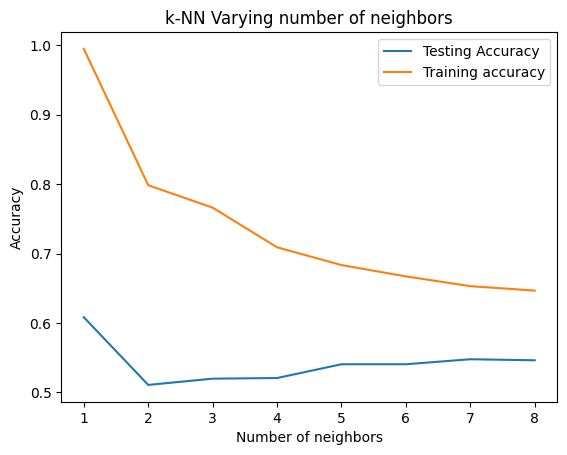

In [86]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [87]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [88]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [89]:
trainpr= knn.predict(X_train)
errortrain = accuracy_score(y_train, trainpr)
print("the train score is " )
errortrain

the train score is 


0.6529917061611374

In [90]:
combine = pd.DataFrame(dict(actual=y_train, predicted=trainpr))

In [91]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,1,3
actual,,,
0,1300,251,403
1,413,613,548
3,393,335,2496


In [92]:

print(classification_report(y_train, trainpr))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1954
           1       0.51      0.39      0.44      1574
           3       0.72      0.77      0.75      3224

    accuracy                           0.65      6752
   macro avg       0.62      0.61      0.61      6752
weighted avg       0.64      0.65      0.65      6752



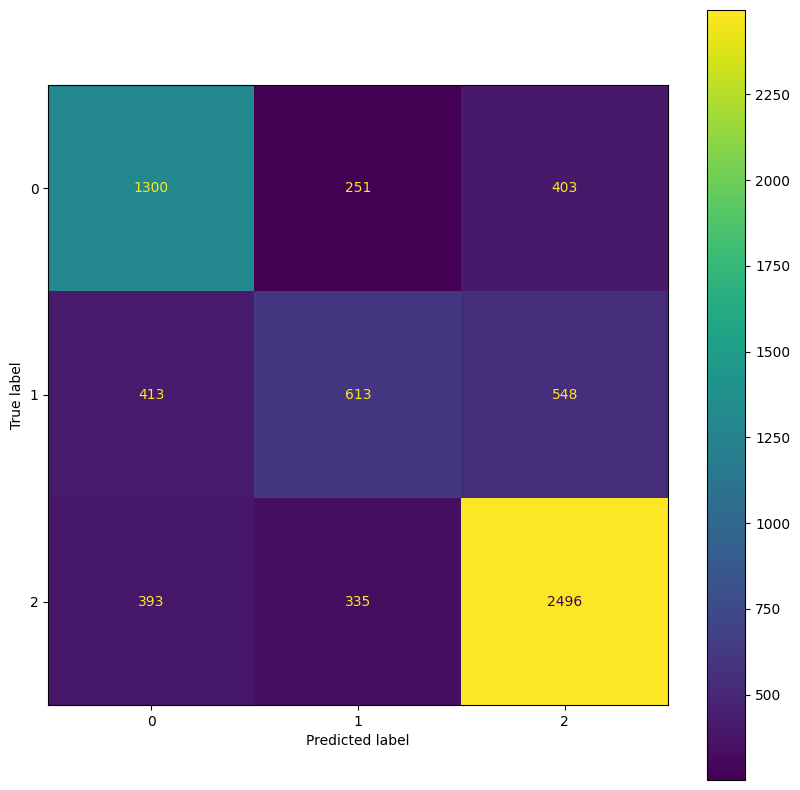

In [93]:


display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, trainpr))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

plt.show()

## test evaluation 

In [94]:
#Fit the model
knn.fit(X_test,y_test)

KNeighborsClassifier(n_neighbors=7)

In [95]:
testpr= knn.predict(X_test)
errortest = accuracy_score(y_test, testpr)
print("the test score is " )
errortest

the test score is 


0.6557426337943476

In [96]:
combine = pd.DataFrame(dict(actual=y_test, predicted=testpr))
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,1,3
actual,,,
0,660,86,216
1,238,258,279
3,184,142,1263


In [97]:

print(classification_report(y_test, testpr))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65       962
           1       0.53      0.33      0.41       775
           3       0.72      0.79      0.75      1589

    accuracy                           0.66      3326
   macro avg       0.62      0.60      0.60      3326
weighted avg       0.64      0.66      0.64      3326



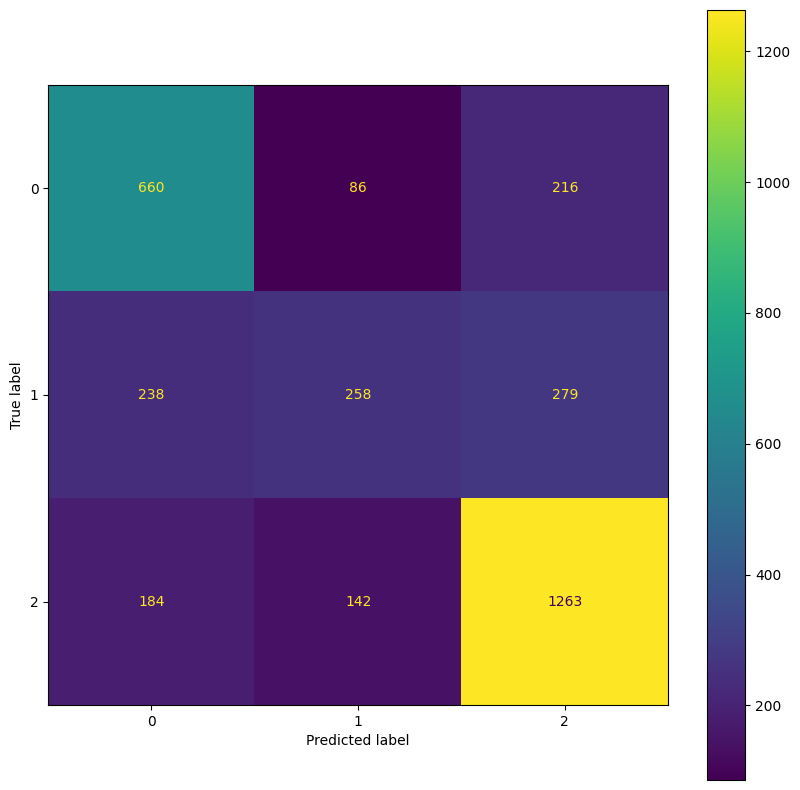

In [98]:

display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, testpr))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

plt.show()

### Result KNNClassifier 
* Accuracy on train is at 66% and 65% on test, still no overfitting
* Overall recall and precision are better than SGD
* Better result than SGDClassifier 

In [99]:
import pickle 
filename = 'finalized_model.pkl'
pickle.dump(knn, open(filename, 'wb'))

# Random classifier 
* Open DF with countries not encoded 

In [ ]:
df = pd.read_csv('df_for_ML.csv', index_col='date')
df.head()

In [ ]:
X = df.drop(['result'], axis=1)
y = df['result']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=400, min_samples_split=10, random_state=1, max_features='sqrt')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1 , stratify=y) #, stratify=y)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
trainpreds= rf.predict(X_train)
errortrain = accuracy_score(y_train, trainpreds)
print("the train score is " )
errortrain

In [ ]:
combine = pd.DataFrame(dict(actual=y_train, predicted=trainpreds))

In [ ]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

In [ ]:

print(classification_report(y_train, trainpreds))

### Test 
* predict / accuracy / confusion matrix 

In [ ]:
preds = rf.predict(X_test)

In [ ]:
error = accuracy_score(y_test, preds)
print("the test score is " )
error

In [ ]:
combined = pd.DataFrame(dict(actual=y_test, predicted=preds))

In [ ]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

### Result for Random Classifier 
* Accuracy on train is at 93% and test 65% (It seems to overfit very well :c )

## New predictions

In [ ]:

df.loc[(df['away_team'] == 52 )].tail()

In [ ]:
# New prediction knn

# Now predict Qatar/Ecuator
other_data = [[142,52,50,44, 6, 73.93,71, 73.93, 73.93,73.93, 73.5 ,76, 74.5]]
other_data_normalized = Scaller.fit_transform(other_data)
result = knn.predict(other_data_normalized)
print("Le résultat de la prédiction pour léquipe qui recoit est") , result

In [ ]:
# New prediction knn

# Now predict England/Iran 

other_data = [[55,81,5,20, 6, 83,73 , 85, 88,84, 69 ,75.3, 69]]
other_data_normalized = Scaller.fit_transform(other_data)
result = grid.predict(other_data_normalized)
print("Le résultat de la prédiction pour léquipe qui recoit est") , result

# Keras classification

In [ ]:
import tensorflow as tf

In [ ]:
X_train.shape, y_train.shape

In [ ]:
N, D = X_train.shape # number of observation and variables

In [ ]:
# Configuration options
training_split = 1000
num_classes = 3
loss_function_used = 'categorical_hinge'
learning_rate_used = 0.03
additional_metrics = ['accuracy']
num_epochs = 20
batch_size = 5 # X_train.shape[0] 
validation_split = 0.2 # 20%

In [ ]:
# Create the model
model = Sequential()
model.add(Dense(32, input_shape=(D,), activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(16, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='relu'))

In [ ]:
# Configure the model and start training
model.compile(loss=loss_function_used, optimizer='adam', metrics=additional_metrics)
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1, validation_split=validation_split)

In [ ]:
# testing the model with using evaluate method
test_result = model.evaluate(X_test, y_test)
for i in range(len(test_result)):
    print(f'{model.metrics_names[i]} ---> {test_result[i]}')

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

# Visualize training process
plt.plot(history.history['loss'], label='Categorical Hinge loss (training data)')
plt.plot(history.history['val_loss'], label='Categorical Hinge loss (validation data)')
plt.title('Categorical Hinge loss for circles')
plt.ylabel('Categorical Hinge loss value')
plt.yscale('log')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
df_temp = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df_temp.head()

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier 

In [ ]:
mlp_reg = MLPClassifier(hidden_layer_sizes=(150,100,50), alpha = 0.05, 
                       max_iter = 50,activation = 'relu', learning_rate = 'constant', 
                       solver = 'adam' , early_stopping=True)

mlp_reg.fit(X_train, y_train)


In [ ]:
trainpreds= mlp_reg.predict(X_train).round()
errortrain = accuracy_score(y_train, trainpreds)
print("the train score is " )
errortrain

In [ ]:
print(classification_report(y_train, trainpreds))

In [ ]:
df_temp = df_temp.head(10)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 500],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_) 

## Test 

In [ ]:
y_pred = mlp_reg.predict(X_test).round()

In [ ]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head(1)

In [ ]:
testpreds= mlp_reg.predict(X_test).round()
errortest = accuracy_score(y_test, testpreds)
print("the test score is " )
errortest

In [ ]:
print(classification_report(y_test, testpreds))

# Model choosen will be the KNN Classifier with 66% accuracy on train and 65% on test


# New search with rolling method on the variables "work in process"

In [ ]:
df = pd.read_csv('df_for_ML_countries_not_numeric.csv')
df.head()

In [ ]:
grouped_matches = df.groupby("home_team")

In [ ]:
group = grouped_matches.get_group("France").sort_values("date")

In [ ]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [ ]:
cols = ['home_team_score', 'away_team_score',
       'tournament', 'shoot_out', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score']
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

In [ ]:
matches_rolling = df.groupby("home_team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [ ]:
matches_rolling = matches_rolling.droplevel('home_team')


In [ ]:
matches_rolling.index = range(matches_rolling.shape[0])

In [ ]:
matches_rolling.loc[(matches_rolling['home_team'] == 'Qatar' )]

In [ ]:
def make_predictions(data, predictors):
    train = data[data.index < '2022-10-01']
    test = data[data.index < '2022-10-01']
    rf.fit(train[predictors], train["result"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["result"], predicted=preds), index=test.index)
    error = precision_score(test["result"], preds)
    return combined, error

In [ ]:
combined, error = make_predictions(matches_rolling, predictors + new_cols)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import f1_score
from os import path, makedirs, walk
from joblib import dump, load
import json

# Utility Functions


def train_classifier(clf, X_train, y_train):
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    print("Model trained in {:2f} seconds".format(end-start))


def predict_labels(clf, features, target):
    start = time()
    y_pred = clf.predict(features)
    end = time()
    print("Made Predictions in {:2f} seconds".format(end-start))

    acc = sum(target == y_pred) / float(len(y_pred))

    return f1_score(target, y_pred, average='micro'), acc


def model(clf, X_train, y_train, X_test, y_test):
    train_classifier(clf, X_train, y_train)

    f1, acc = predict_labels(clf, X_train, y_train)
    print("Training Info:")
    print("-" * 20)
    print("F1 Score:{}".format(f1))
    print("Accuracy:{}".format(acc))

    f1, acc = predict_labels(clf, X_test, y_test)
    print("Test Metrics:")
    print("-" * 20)
    print("F1 Score:{}".format(f1))
    print("Accuracy:{}".format(acc))


def derive_clean_sheet(src):
    arr = []
    n_rows = src.shape[0]

    for data in range(n_rows):

        #[HTHG, HTAG]
        values = src.iloc[data].values
        cs = [0, 0]

        if values[0] == 0:
            cs[1] = 1

        if values[1] == 0:
            cs[0] = 1

        arr.append(cs)

    return arr


# Training & Testing


svc_classifier = SVC(random_state=100, kernel='rbf')
lr_classifier = LogisticRegression(multi_class='ovr', max_iter=500)
nbClassifier = GaussianNB()
dtClassifier = DecisionTreeClassifier()
rfClassifier = RandomForestClassifier()

# print("Support Vector Machine")
# print("-" * 20)
# model(svc_classifier, X_train, Y_train, X_test, Y_test)

print()
print("Logistic Regression one vs All Classifier")
print("-" * 20)
model(lr_classifier, X_train, y_train, X_test, y_test)

print()
print("Gaussain Naive Bayes Classifier")
print("-" * 20)
model(nbClassifier, X_train, y_train, X_test, y_test)

# print()
# print("Decision Tree Classifier")
# print("-" * 20)
# model(dtClassifier, X_train, Y_train, X_test, Y_test)

print()
print("Random Forest Classifier")
print("-" * 20)
model(rfClassifier, X_train, y_train, X_test, y_test)

# Exporting the Model
print()
print()
shouldExport = input('Do you want to export the model(s) (y / n) ? ')
if shouldExport.strip().lower() == 'y':
    exportedModelsPath = 'exportedModels'

    makedirs(exportedModelsPath, exist_ok=True)

    dump(lr_classifier, f'{exportedModelsPath}/lr_classifier.model')
    dump(nbClassifier, f'{exportedModelsPath}/nb_classifier.model')
    dump(rfClassifier, f'{exportedModelsPath}/rf_classifier.model')

    exportMetaData = dict()
    exportMetaData['home_teams'] = home_encoded_mapping
    exportMetaData['away_teams'] = away_encoded_mapping

    exportMetaDataFile = open(f'{exportedModelsPath}/metaData.json', 'w')
    json.dump(exportMetaData, exportMetaDataFile)

    print(f'Model(s) exported successfully to {exportedModelsPath}/')